In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv'

In [3]:
medical_df = pd.read_csv(url, sep=',')
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
# Sex is the column which does not affect the dependent variable, thud dropping it
#medical_df = medical_df.drop('sex', axis=1)

In [4]:
# Sex, Smoker and Region columns are string columns and thus needs to be encoded in float for building the model
medical_data = pd.get_dummies(medical_df, columns=['sex'])

In [6]:
medical_data = pd.get_dummies(medical_data, columns=['smoker'])

In [7]:
medical_data = pd.get_dummies(medical_data, columns=['region'])

In [9]:
medical_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
# Define the new column index order
new_column_order = ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast',
                    'region_southwest', 'charges']

# Reindex the DataFrame with the new column index order
medical_data = medical_data.reindex(columns=new_column_order)

In [14]:
medical_data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,1,0,0,3866.85520


In [12]:
# Extracting the independent and dependent variables
X = medical_data.iloc[:, :-1].values
y = medical_data.iloc[:, 11].values

In [13]:
# Looking at the charges column, which is required to predict
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

<Axes: >

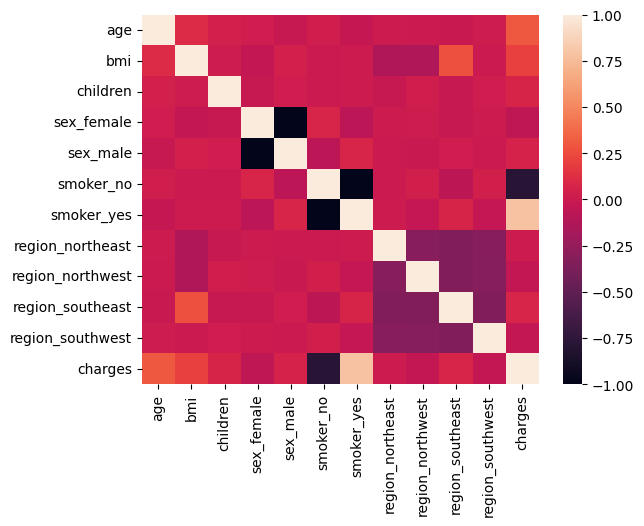

In [15]:
# Data visualisation
# Building the correlation matrix

import seaborn as sns
sns.heatmap(medical_data.corr())

In [16]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [17]:
# Build the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict on the test data
y_pred = model.predict(X_test)
y_pred

array([ 1.51915702e+04,  9.51220694e+03,  2.83067055e+04,  5.33489181e+03,
        1.12121426e+04,  1.09231488e+04,  2.82162564e+03,  2.37064499e+03,
        4.24923264e+03,  8.80690589e+03,  8.70711170e+03,  1.35398749e+04,
        1.34312480e+04,  2.96948674e+04,  1.36904560e+04,  3.08454934e+04,
        1.51858420e+04,  1.78870890e+03,  3.35306429e+04,  3.65015845e+04,
        3.33360125e+04,  4.06885009e+04,  3.18005843e+03,  1.01704861e+04,
       -4.42259461e+01,  9.55006487e+03,  1.60478406e+04,  6.73044447e+03,
        1.46113601e+04, -4.76667414e+02,  9.34223008e+03,  1.64609838e+04,
        5.45341973e+03,  3.93259048e+03,  6.67866279e+03,  1.15602244e+04,
        1.78154217e+04,  6.80407588e+03,  9.96955042e+03,  1.15234954e+04,
        7.07059154e+03,  7.68145396e+03,  5.43398017e+03,  3.16896600e+04,
        7.30755840e+03,  2.17045609e+03,  1.31128236e+04,  1.38572605e+04,
        1.45496596e+04,  9.11588158e+03,  1.27749639e+04,  1.08809463e+04,
        2.72841162e+04,  

In [19]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 30552437.41652551


In [21]:
# Calculating the coefficients

print(model.coef_)

[   255.64732788    342.67603001    451.58728746     41.72084482
    -41.72084482 -11750.50550844  11750.50550844    619.7104357
    200.49030407   -413.56324257   -406.6374972 ]


In [22]:
# Calculating the R-squared value

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8001744488359045

Since, the dependent variable (charges) is float in nature, thus the best evaluation metric in this case is R-squared value. In this case, the R-square value is 0.8 which is quite good, hence the model is performing good.